In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv("drive/MyDrive/Colab_Notebooks/Machine Learning Bootcamp/insurance.csv")

In [126]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [128]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
color = ["Blue", "Pink"]
sns.set_palette(color)

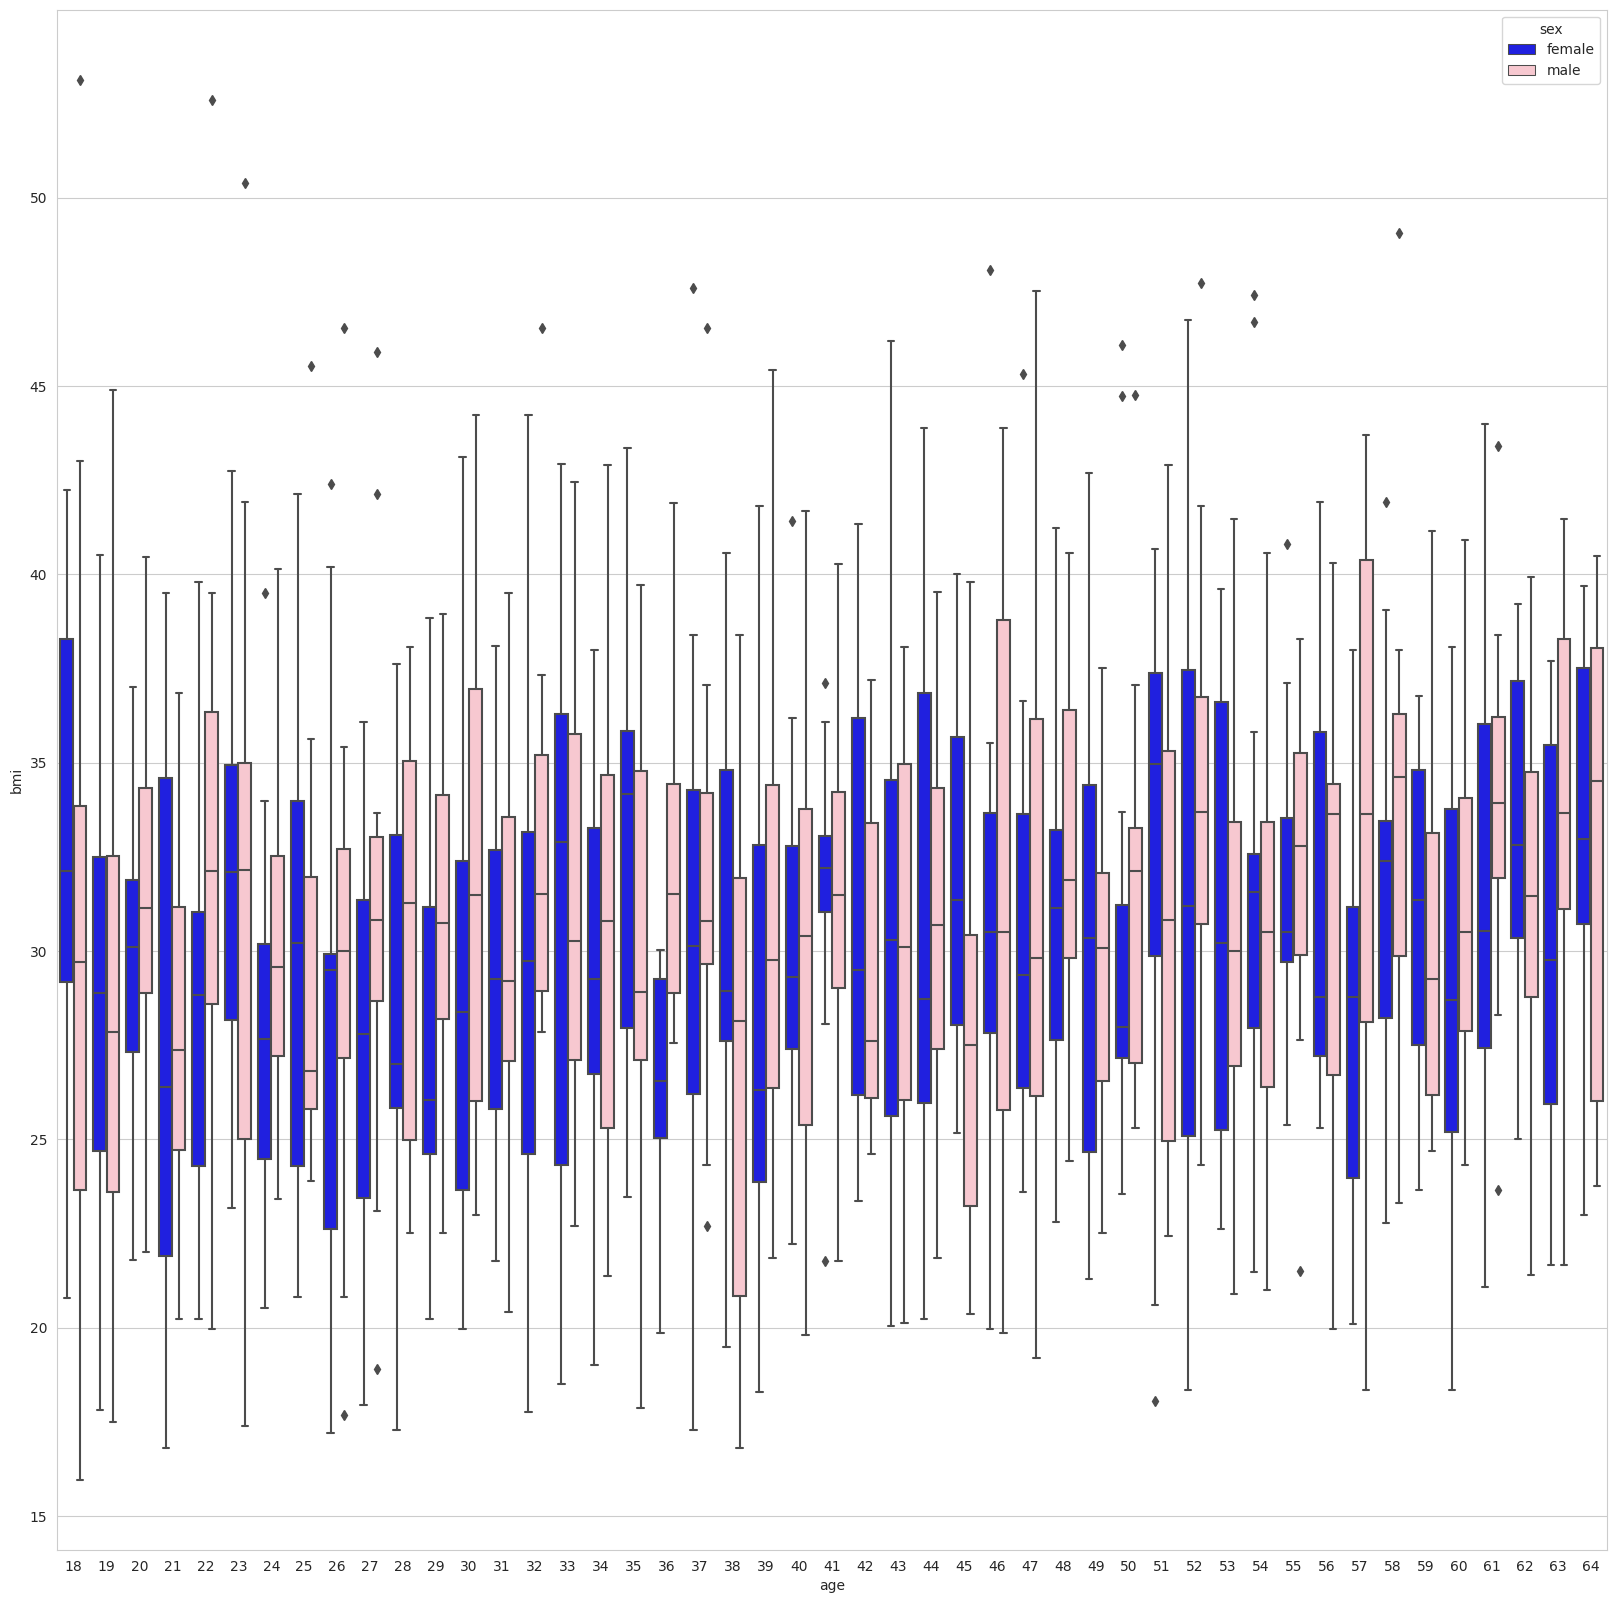

In [57]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x="age",y="bmi",hue = "sex",data=data,ax=ax)
plt.show()

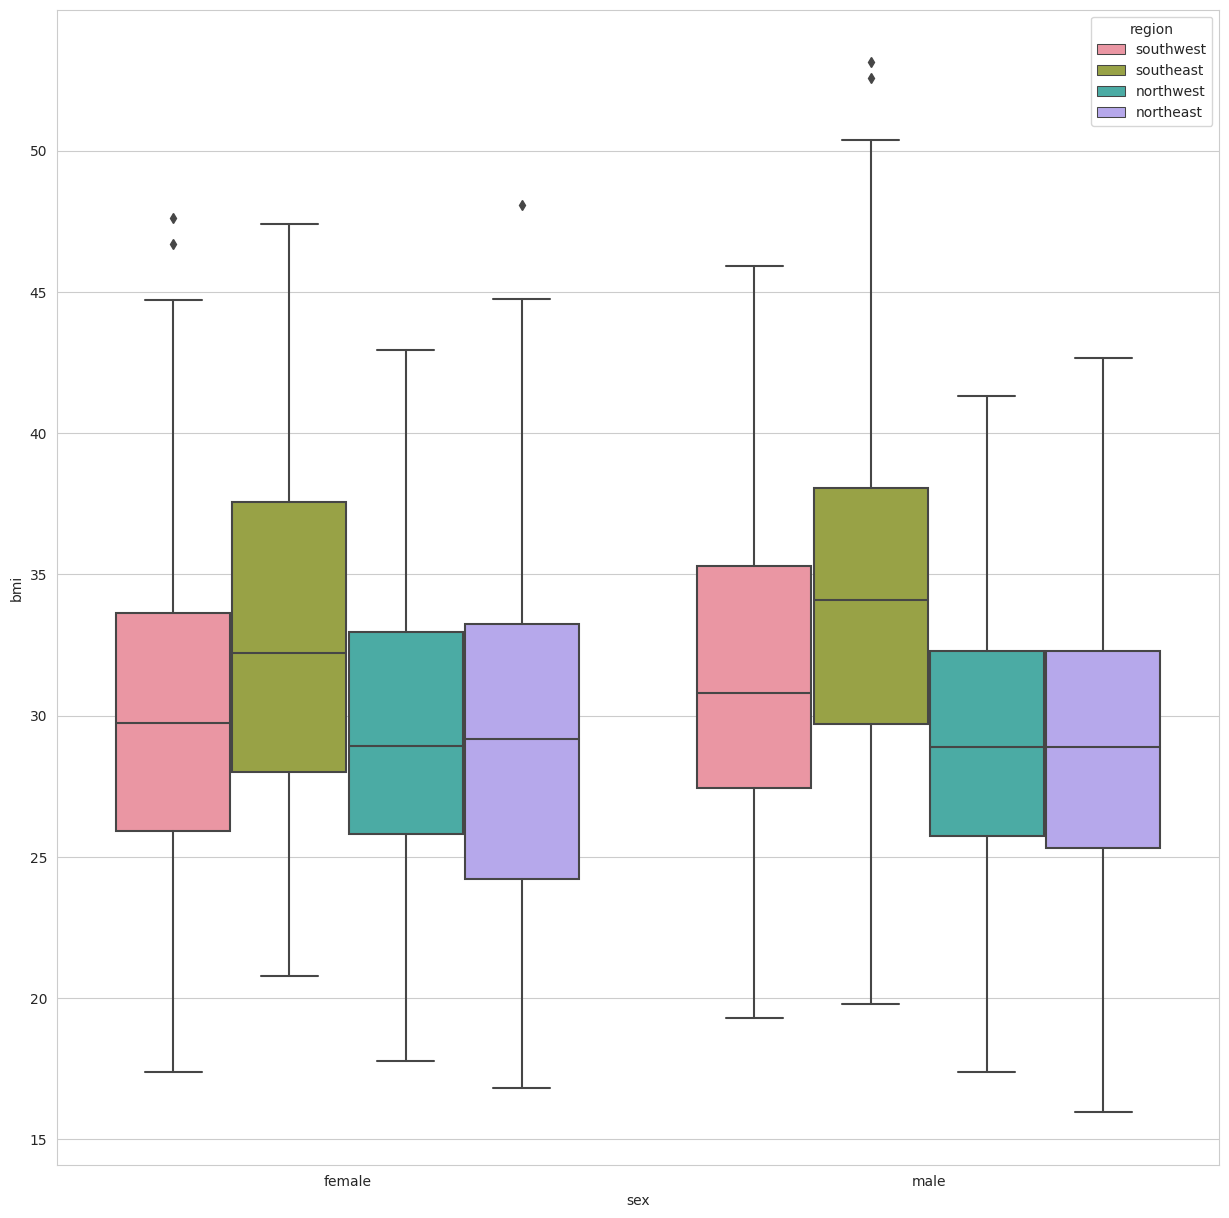

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(x="sex",y="bmi",hue = "region",data=data,ax=ax)
plt.show()
# southeast bölgesinde kadınların ve erkeklerin ortalama bmi değerleri daha yüksek

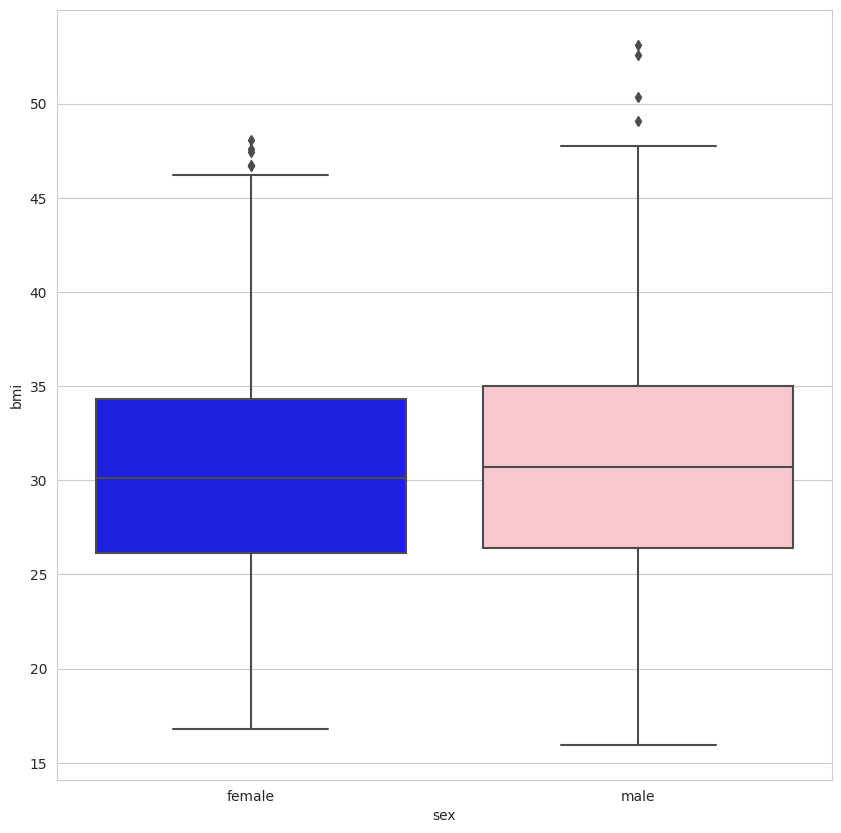

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="sex",y="bmi",data=data,ax=ax)
plt.show()
# Kadınlara ait bmi değerleri daha düşük değerlerden başlayarak daha düşük değerlerde bitiyor, aralık daha dar
# bmi değerleri yaklaşık 47'den sonra aykırılaşıyor

In [60]:
sns.set_palette(sns.color_palette("pastel"))

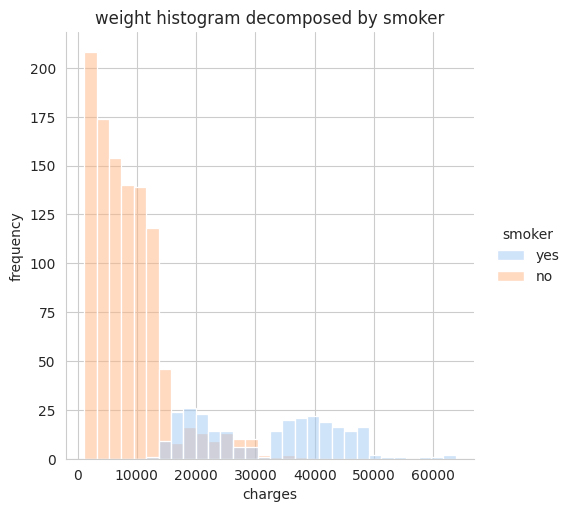

In [61]:
sns.displot(data,x="charges",hue="smoker")
plt.ylabel("frequency")
plt.title("weight histogram decomposed by smoker")
plt.show()
# sigara içenlerin harcamaları daha fazla, özellikle 1000-3000 ve 4000-5000 aralığında yoğun

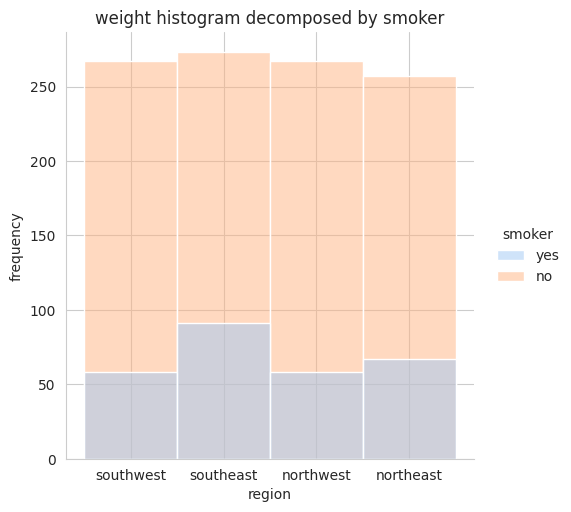

In [62]:
sns.displot(data,x="region",hue="smoker")
plt.ylabel("frequency")
plt.title("weight histogram decomposed by smoker")
plt.show()

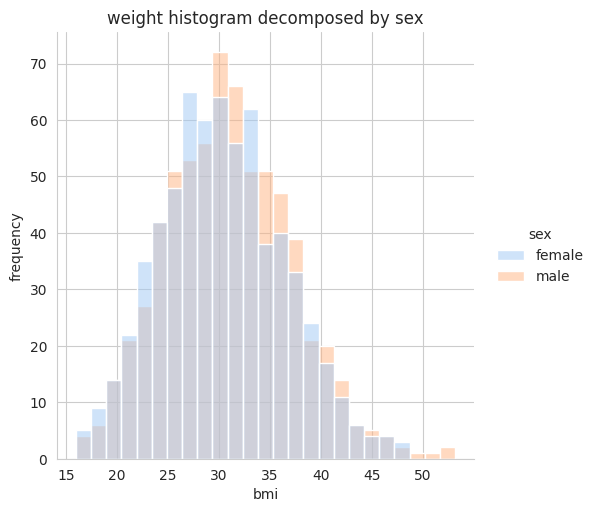

In [63]:
sns.displot(data,x="bmi",hue="sex")
plt.ylabel("frequency")
plt.title("weight histogram decomposed by sex")
plt.show()
# erkeklerde en yoğun bmi değeri 30 civarı, kadınlarda 27-28 civarı

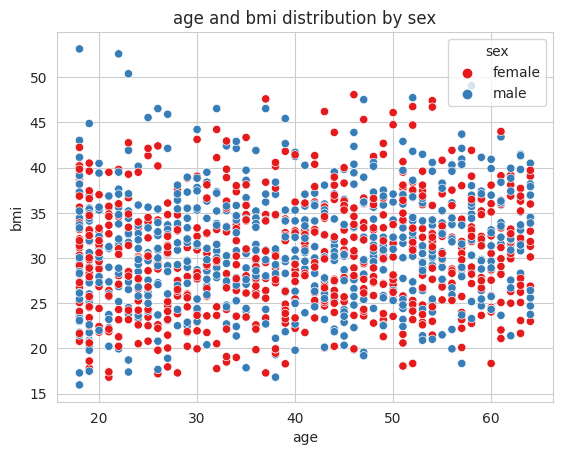

In [64]:
sns.scatterplot(x='age',y='bmi',hue='sex',data=data,palette='Set1')
plt.title("age and bmi distribution by sex")
plt.show()

In [65]:
data.groupby(['region'])['children'].sum()
# çocuk sayısı en fazla olan bölge southeast

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

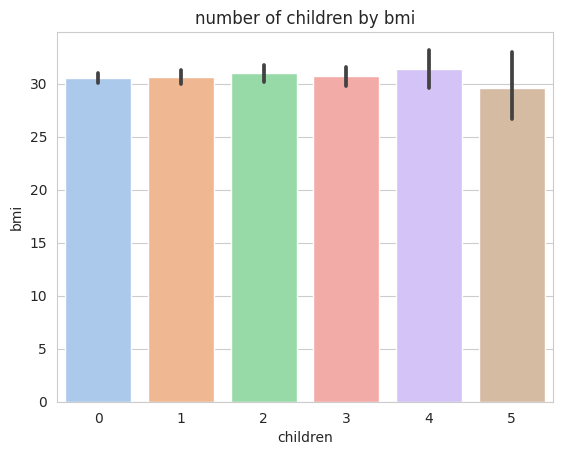

In [66]:
sns.barplot(x="children",y="bmi",data=data)
plt.title("number of children by bmi")
plt.show()
# 4 çocuğa sahip bireylerin bmi değerleri ortalaması en yüksek

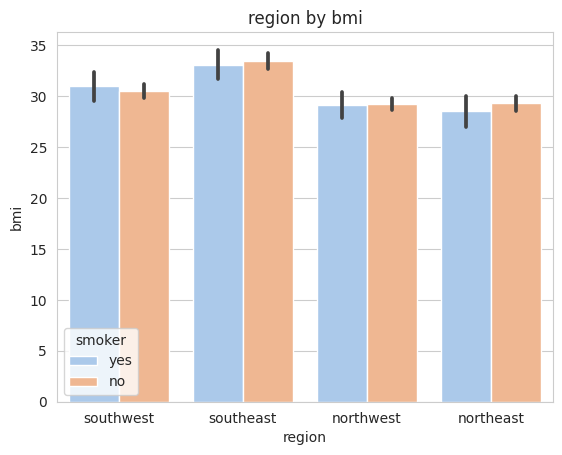

In [67]:
sns.barplot(x="region",y="bmi",data=data,hue="smoker")
plt.title("region by bmi")
plt.show()


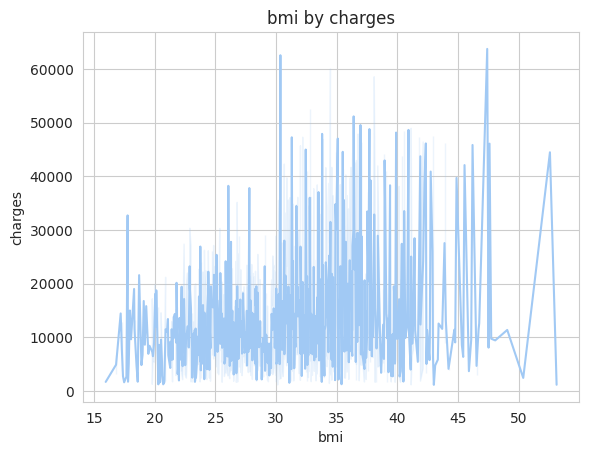

In [68]:
sns.lineplot(x='bmi',y='charges',data=data)
plt.title('bmi by charges')
plt.show()

In [129]:
IQR = data['bmi'].quantile(0.75) - data['bmi'].quantile(0.25)
IQR

8.3975

In [130]:
Higher_outlier = data['bmi'].quantile(0.75) + (IQR * 1.5)
lower_outlier = data['bmi'].quantile(0.25) - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

47.290000000000006
13.7


In [131]:
data.loc[data['bmi'] >= Higher_outlier, 'bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [132]:
data.loc[data['bmi'] <= lower_outlier, 'bmi']

Series([], Name: bmi, dtype: float64)

In [133]:
# aykırı bmi değerlerini eşiğe eşitleme
data.loc[data['bmi'] >= Higher_outlier, 'bmi'] = 47.29

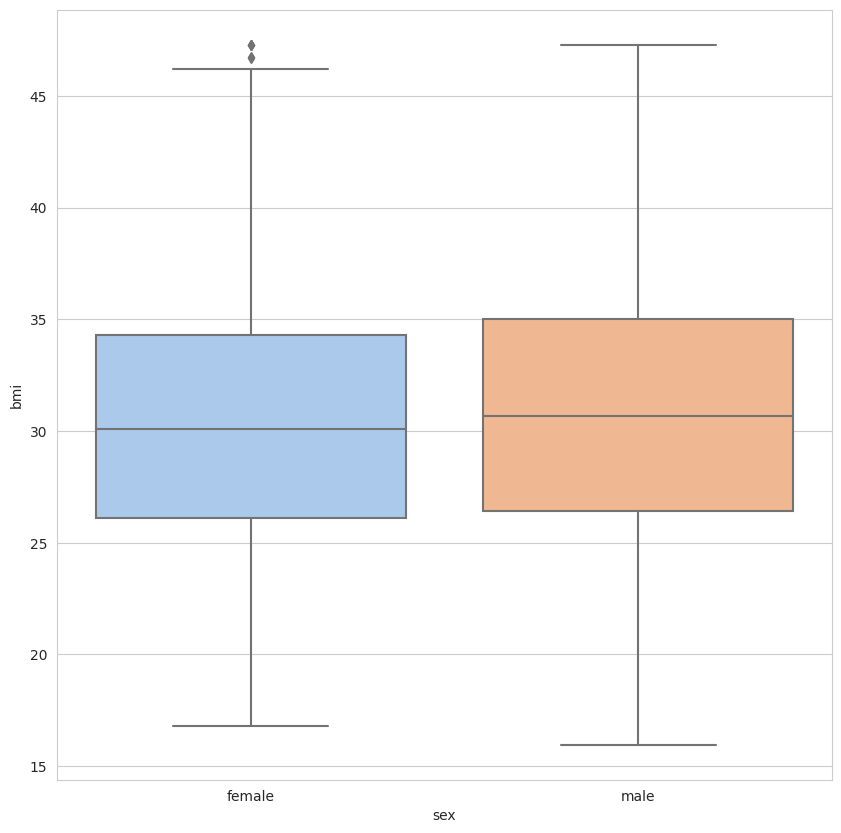

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="sex",y="bmi",data=data,ax=ax)
plt.show()
# aykırı değerlerin çoğu temizlendi

In [135]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [136]:
data = pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True)

In [137]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


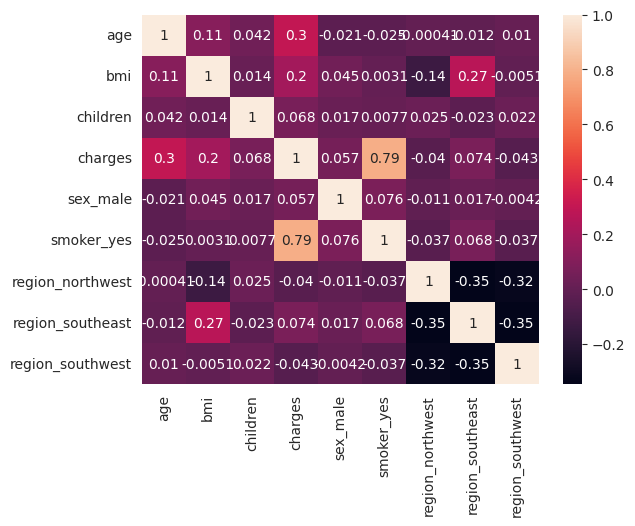

In [138]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [139]:
x = data.iloc[:,0:6].values
y = data['charges']

In [140]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [141]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [143]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.9947186433532748


In [144]:
scores = cross_val_score(lr, x, y, cv=5)
scores.mean()

1.0

In [100]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [148]:
y_pred = lr.predict(x_test)
# y_pred = pd.DataFrame(y_pred)
MAE_lr= mean_absolute_error(y_test, y_pred)
MSE_lr = mean_squared_error(y_test, y_pred)
print(f"MAE: {MAE_lr}")
print(f"MSE: {MSE_lr}")

MAE: 583.9249069979663
MSE: 845843.3535973524


In [150]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
print(dt.score(x_test,y_test))

0.9948367306864552


In [151]:
scores = cross_val_score(dt, x, y, cv=5)
scores.mean()

0.9996514090589986

In [152]:
y_pred = dt.predict(x_test)
# y_pred = pd.DataFrame(y_pred)
MAE_lr= mean_absolute_error(y_test, y_pred)
MSE_lr = mean_squared_error(y_test, y_pred)
print(f"MAE: {MAE_lr}")
print(f"MSE: {MSE_lr}")

MAE: 579.7303285995475
MSE: 826930.9050361258


In [154]:
xgb = XGBRegressor(max_depth = 3, n_estimators = 50, learning_rate = 0.1)
xgb.fit(x_train, y_train)
print(xgb.score(x_test,y_test))

0.9934739677635503


In [155]:
scores = cross_val_score(xgb, x, y, cv=6)
scores.mean()

0.9995850464033573

In [157]:
poly = PolynomialFeatures(degree=2)
x_tr_poly = poly.fit_transform(x_train)
x_ts_poly = poly.fit_transform(x_test)
lreg = LinearRegression()
lreg.fit(x_tr_poly,y_train)
print(lreg.score(x_ts_poly,y_test))

0.9947599344929334


In [158]:
x_poly = poly.fit_transform(x)
scores = cross_val_score(lreg, x_poly, y, cv=2)
scores.mean()

1.0

In [159]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))

0.9698308765465053


In [160]:
scores = cross_val_score(knn, x, y, cv=9)
scores.mean()

0.9991080504852304